In [147]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np

In [148]:
# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [149]:
# Loading the Dataset
path = "/content/drive/MyDrive/Python For Data Science/austo_automobile .csv"
data = pd.read_csv(path)

In [150]:
# Keeping copy of the data
df = data.copy()

# ***1. Data Structure***

# Checking the no.of rows and columns

In [151]:
df.shape

(1581, 14)

# Checking 1st 5 rows

In [152]:
df.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


# Checking the types of data

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.1+ KB


*   The Partner_salary column is being read as a 'float64' data type but it should be "int64' data type.





# Fixing data type

In [154]:
# Drop rows with missing values in 'Partner_salary'
data = data.dropna(subset=["Partner_salary"])

In [155]:
# Or fill missing values with a default value (e.g., 0 or median)

data["Partner_salary"] = data["Partner_salary"].fillna(0)

In [156]:
# Converting Partner_salary column from 'float' to 'int'
df["Partner_salary"] = df["Partner_salary"].fillna(0).astype(int)

In [157]:
# Checking conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1581 non-null   int64 
 1   Gender            1528 non-null   object
 2   Profession        1581 non-null   object
 3   Marital_status    1581 non-null   object
 4   Education         1581 non-null   object
 5   No_of_Dependents  1581 non-null   int64 
 6   Personal_loan     1581 non-null   object
 7   House_loan        1581 non-null   object
 8   Partner_working   1581 non-null   object
 9   Salary            1581 non-null   int64 
 10  Partner_salary    1581 non-null   int64 
 11  Total_salary      1581 non-null   int64 
 12  Price             1581 non-null   int64 
 13  Make              1581 non-null   object
dtypes: int64(6), object(8)
memory usage: 173.1+ KB


*   'Partner_salary' column's data type has changed from 'float' to 'int'



# Checking and Treating Null Values

In [158]:
df.isnull().sum()

,0
Age,0
Gender,53
Profession,0
Marital_status,0
Education,0
No_of_Dependents,0
Personal_loan,0
House_loan,0
Partner_working,0
Salary,0




*   'Gender' column have missing values.


In [159]:
# treating missing values for 'Gender' column
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

In [160]:
# Checking for null values again
df.isnull().sum()

,0
Age,0
Gender,0
Profession,0
Marital_status,0
Education,0
No_of_Dependents,0
Personal_loan,0
House_loan,0
Partner_working,0
Salary,0


# Checking for Unique Values

In [161]:
df.Gender.unique()

array(['Male', 'Femal', 'Female', 'Femle'], dtype=object)

*  There were spelling issues in gender which was creating two extra values  'Femal' and 'Femle' , in the gender column

In [162]:
# Replacing 'Femal' and ' Femle' with "Female"
df["Gender"] = df["Gender"].replace(["Femal", "Femle"], "Female")

In [163]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

# Statical Summary

In [164]:
df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1581.0,NaN,NaN,NaN,31.922201,8.425978,22.0,25.0,29.0,38.0,54.0
Gender,1581,2,Male,1252,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Profession,1581,2,Salaried,896,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_status,1581,2,Married,1443,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,1581,2,Post Graduate,985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
No_of_Dependents,1581.0,NaN,NaN,NaN,2.457938,0.943483,0.0,2.0,2.0,3.0,4.0
Personal_loan,1581,2,Yes,792,NaN,NaN,NaN,NaN,NaN,NaN,NaN
House_loan,1581,2,No,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Partner_working,1581,2,Yes,868,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,1581.0,NaN,NaN,NaN,60392.220114,14674.825044,30000.0,51900.0,59500.0,71800.0,99300.0


# 2. ***Univariate Analysis***

2.1. **Numeric Variables**

We can check the distribution of observations by plotting Histograms and Boxplots

2.1.1. **Observations on Age**

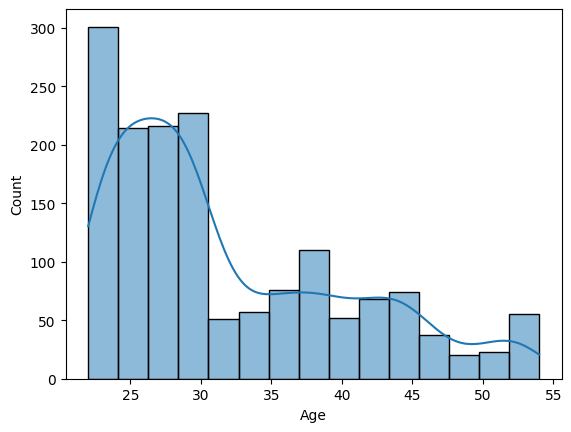

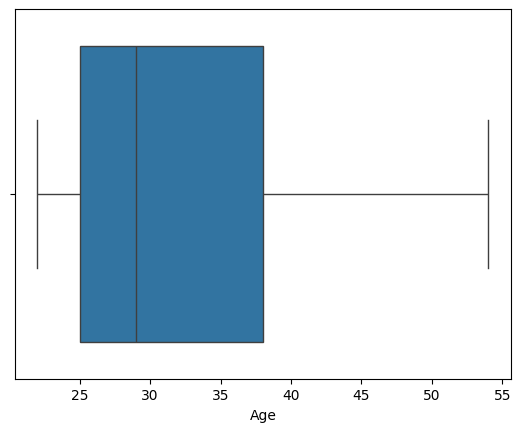

In [165]:
sns.histplot(data=df, x="Age", kde = True)
plt.show()
sns.boxplot(data=df, x= "Age")
plt.show()

2.1.2 **Observations on No.of Dependents**

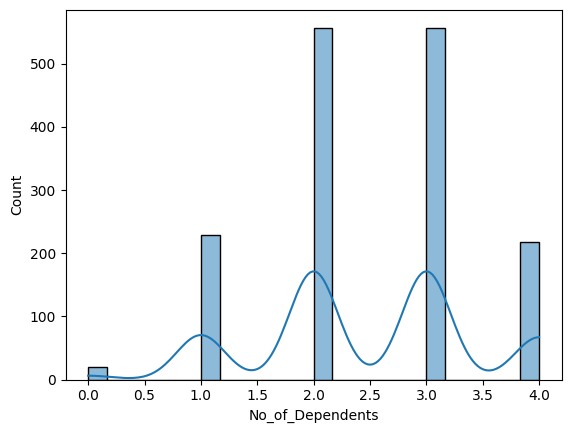

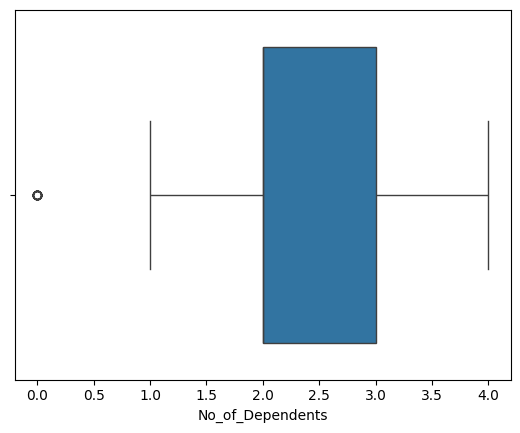

In [166]:
sns.histplot(data=df, x="No_of_Dependents", kde= True)
plt.show()
sns.boxplot(data=df, x= "No_of_Dependents")
plt.show()

2.1.3. **Observations on Salary**

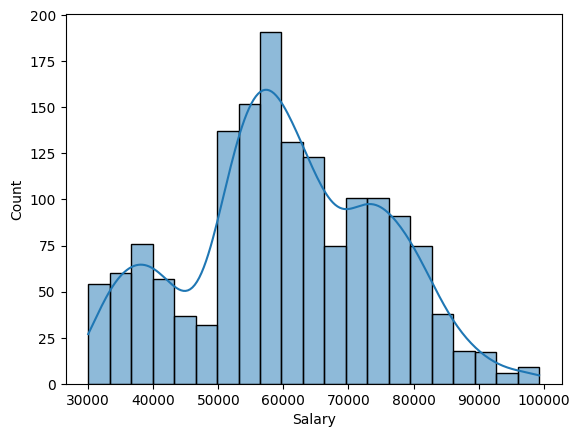

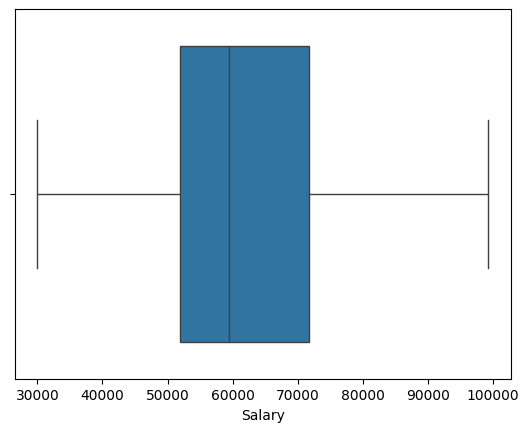

In [167]:
sns.histplot(data=df, x="Salary", kde= True)
plt.show()
sns.boxplot(data=df, x= "Salary")
plt.show()

2.1.4. **Observations on Partner Salary**

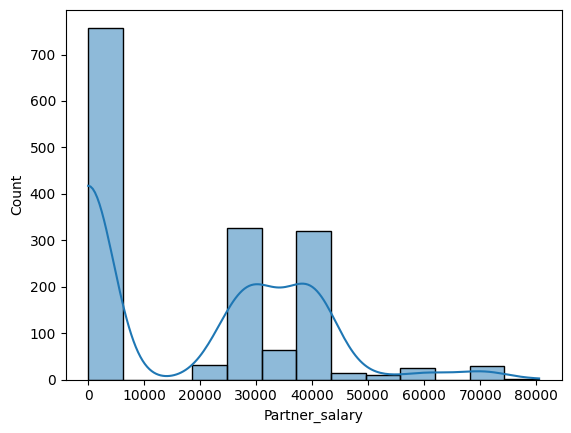

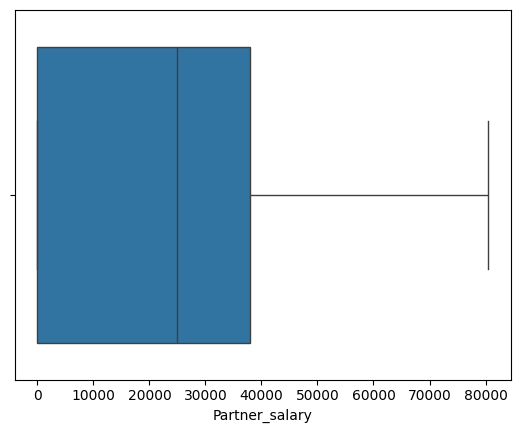

In [168]:
sns.histplot(data=df, x="Partner_salary", kde = True)
plt.show()
sns.boxplot(data=df, x= "Partner_salary")
plt.show()

2.1.5. **Observations on Total Salary**

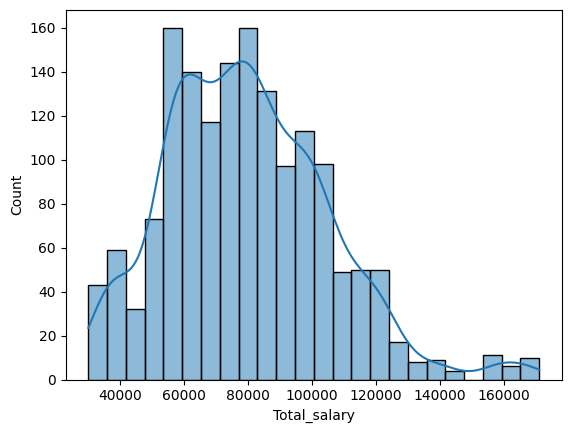

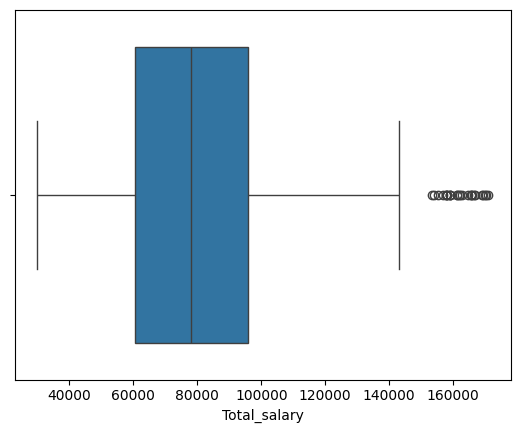

In [169]:
sns.histplot(data=df, x="Total_salary", kde = True)
plt.show()
sns.boxplot(data=df, x= "Total_salary")
plt.show()

2.1.6. **Observations on Price**

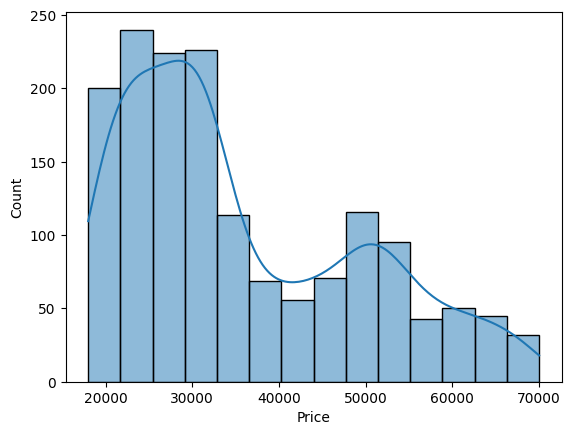

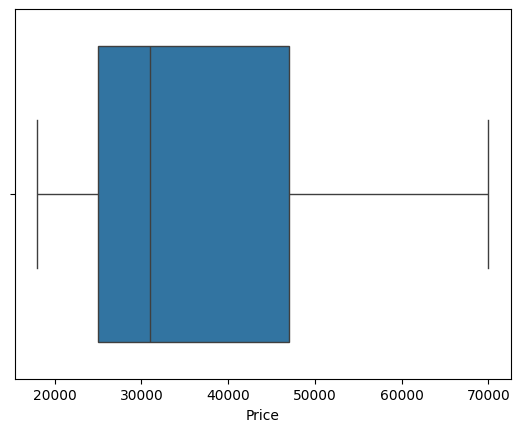

In [170]:
sns.histplot(data=df, x="Price", kde=True)
plt.show()
sns.boxplot(data=df, x= "Price")
plt.show()

2.2. **Categorical Variables**

Bar Charts can be used to explore the distribution of Categorical Variables.

2.2.1 **Observations on Gender**

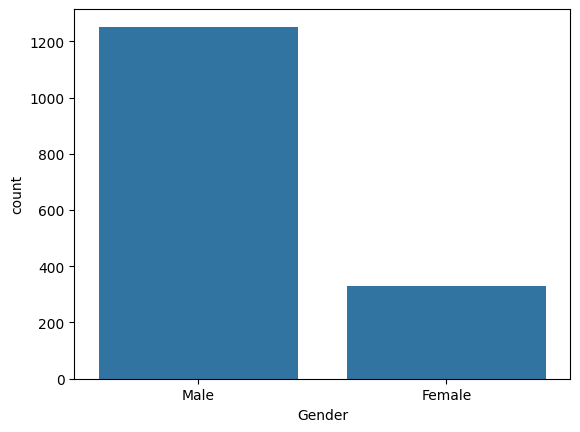

In [171]:
sns.countplot(data=df, x="Gender")
plt.show()

2.2.2. **Observations on Profession**

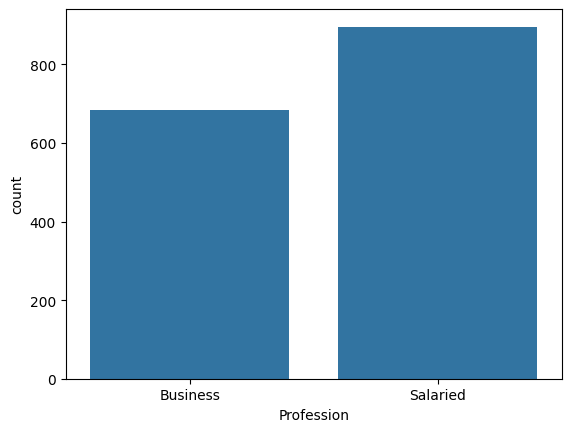

In [172]:
sns.countplot(data=df, x="Profession")
plt.show()

2.2.3. **Observations on Marital status**

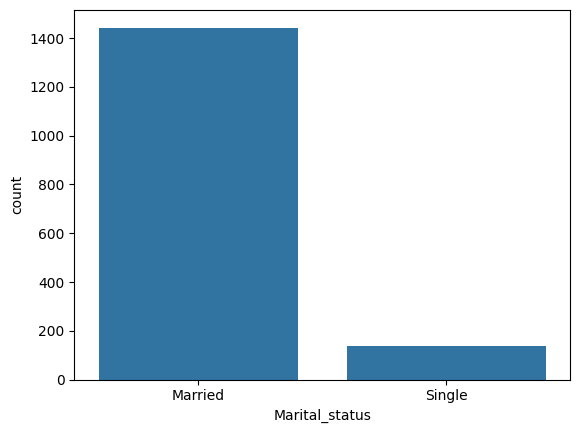

In [173]:
sns.countplot(data=df, x="Marital_status")
plt.show()

2.2.4.**Observations on Education**

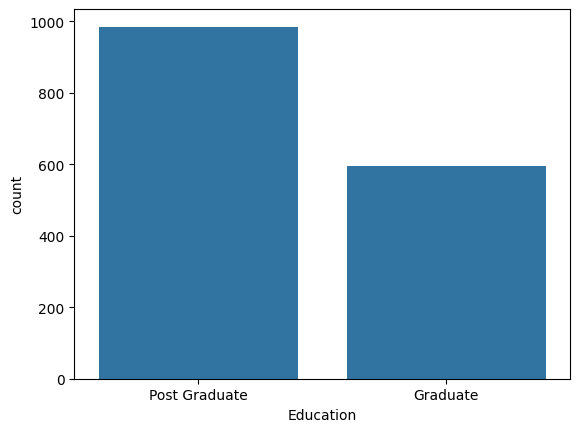

In [174]:
sns.countplot(data=df, x="Education")
plt.show()

2.2.5. **Observations on Personal Loan**

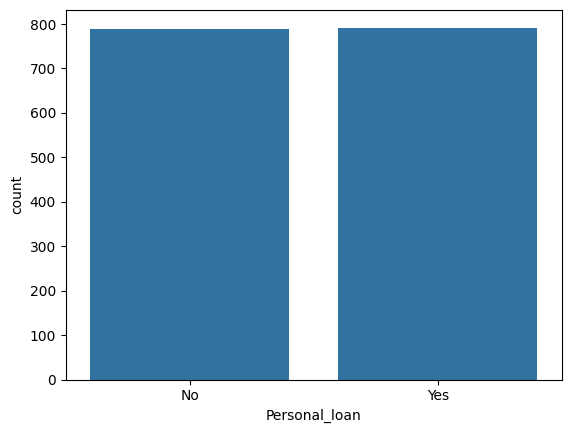

In [175]:
sns.countplot(data=df, x="Personal_loan")
plt.show()

2.2.6.**Observations on House Loan**

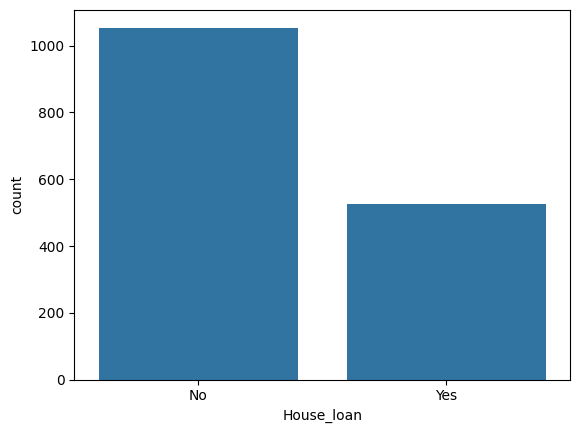

In [176]:
sns.countplot(data=df, x="House_loan")
plt.show()

2.2.7. **Observations on Partner working**

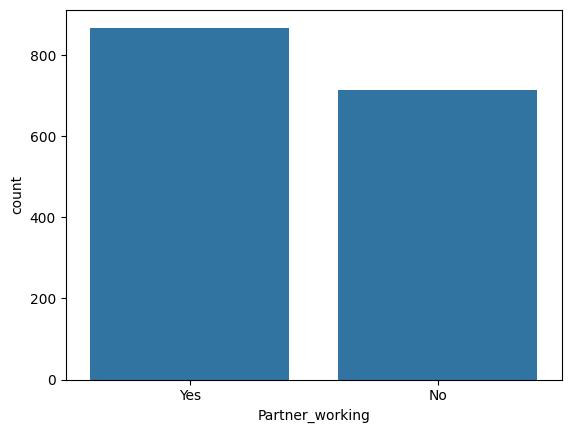

In [177]:
sns.countplot(data=df, x="Partner_working")
plt.show()

2.2.8.**Observations on Make**

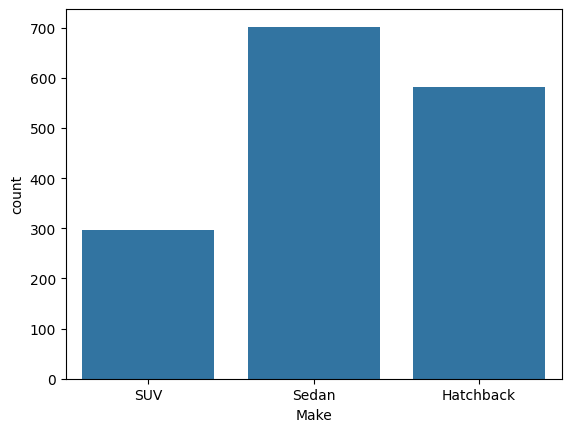

In [178]:
sns.countplot(data=df, x="Make")
plt.show()

2.3. **Detecting and Treating Outliers**

We can see there are ouliers in 'No. of Dependents' and 'Total salary' boxplot.

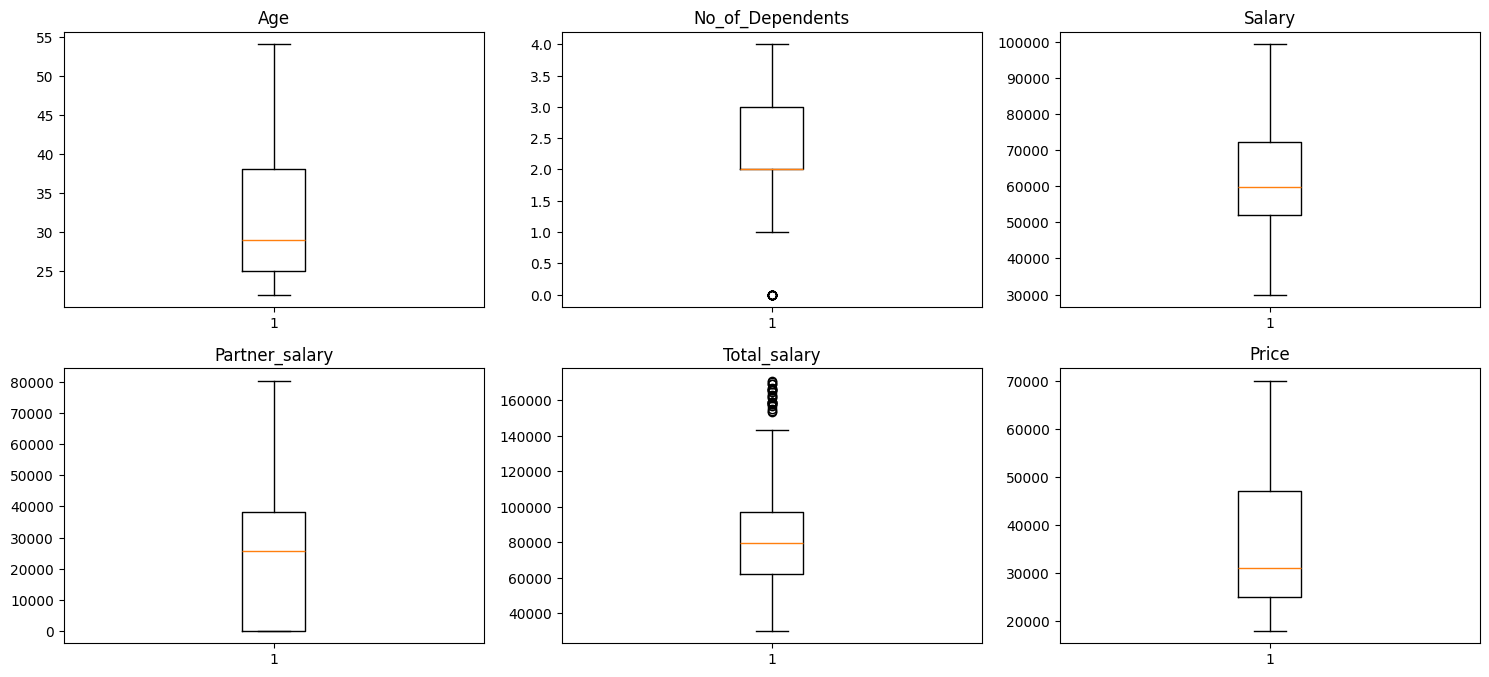

In [179]:
numeric_columns = ["Age", "No_of_Dependents", "Salary","Partner_salary", "Total_salary", "Price"]
plt.figure(figsize=(15, 10))

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 3, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()




* Some individuals may have a larger number of family members, leading to a
  higher number of dependents.
* In certain households, both partners may earn a substantial income, resulting
  in a higher total salary.



# 3.***Bivariate Analysis***

3.1. **Relationship between all Numeric Variables**

We can analyse this by using Scatterplot.

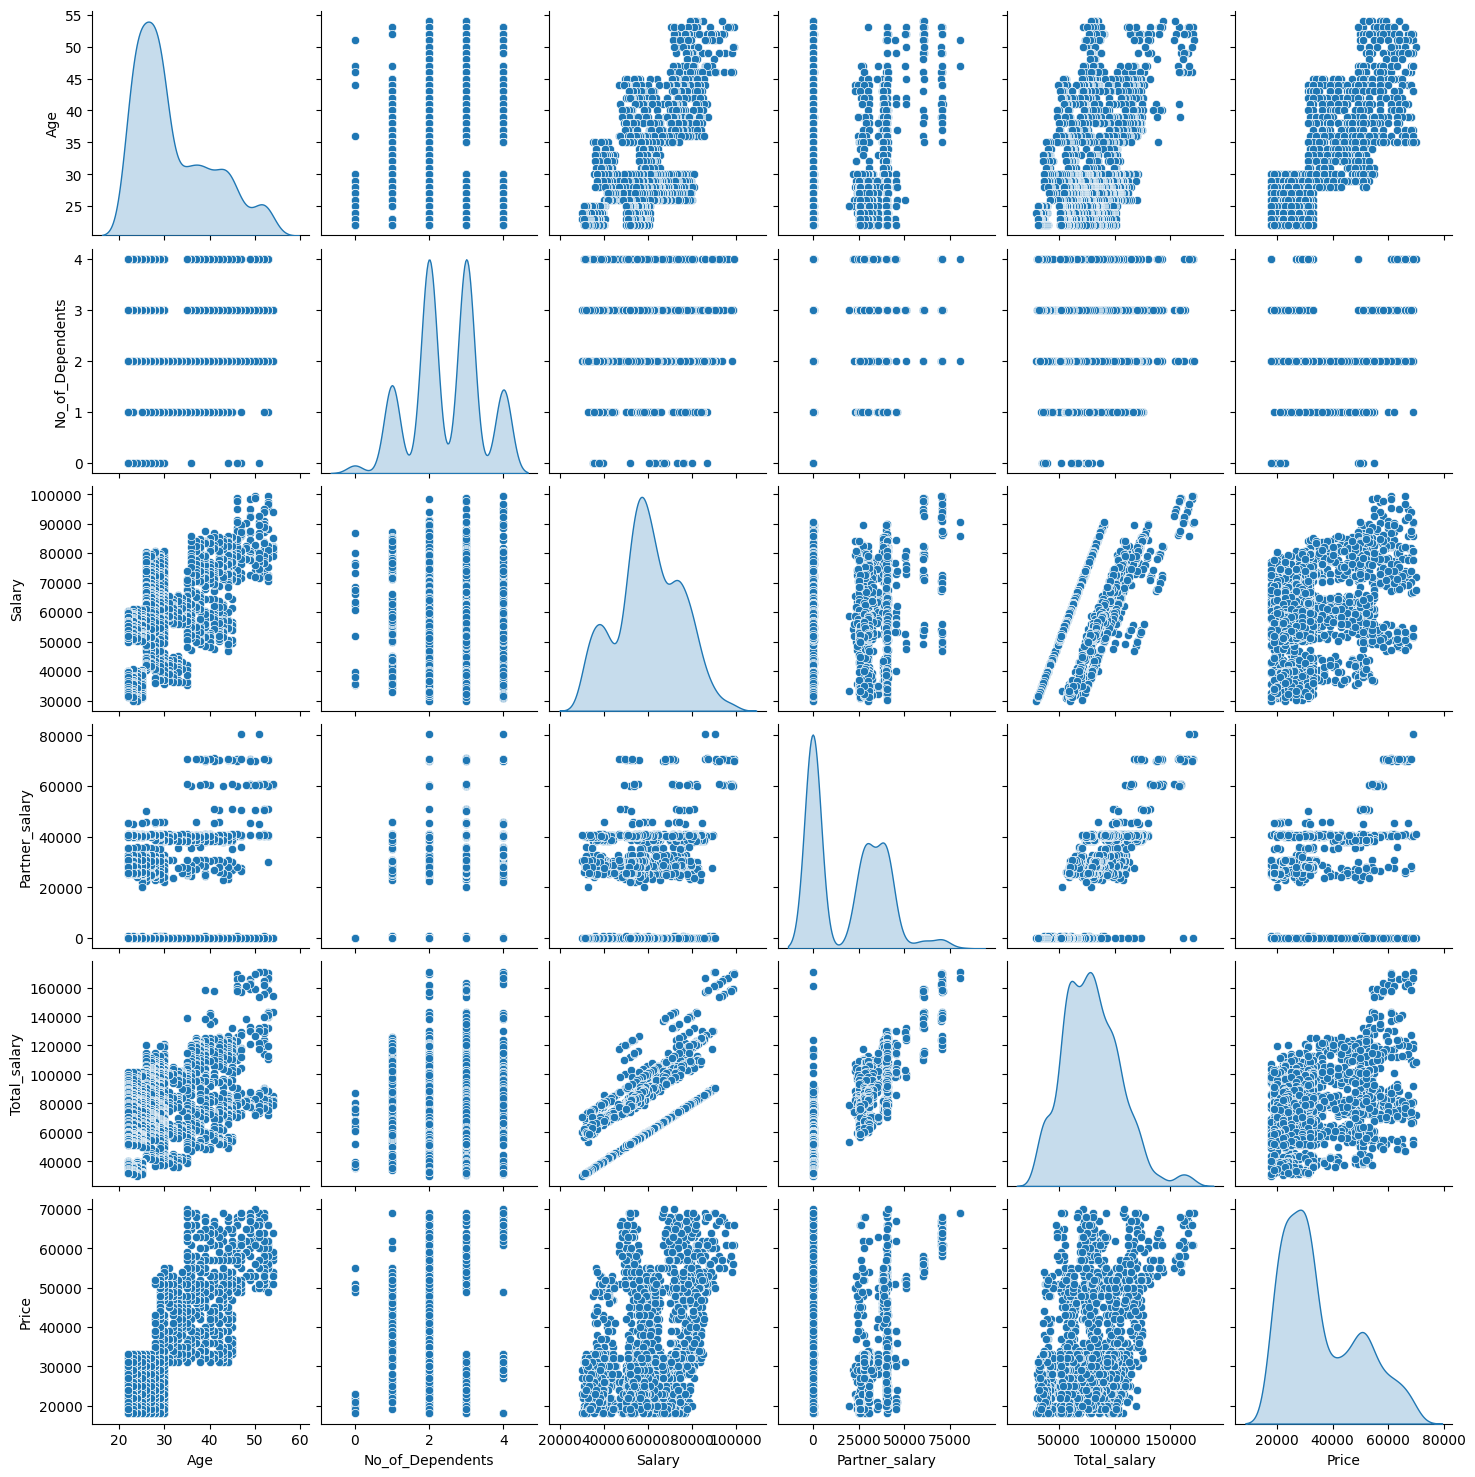

In [180]:
sns.pairplot(data=df[numeric_columns], diag_kind="kde")
plt.show()

3.2 **Correlation between all Numeric Variables**

We can analyse correlation by using Heatmap.

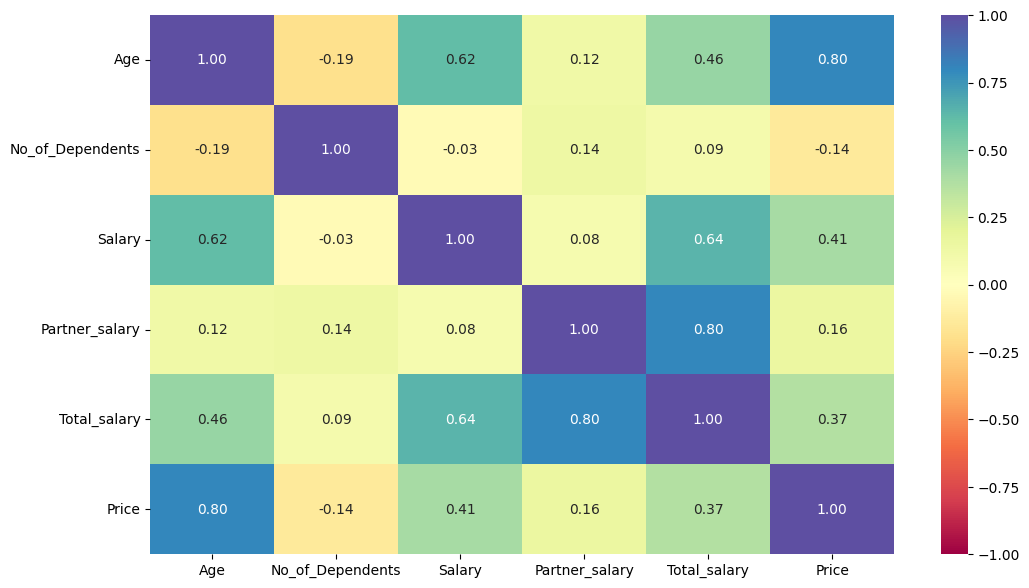

In [181]:
corr = df[numeric_columns].corr()

# plot the heatmap

plt.figure(figsize=(12, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()



*   There are strong linear correlations between 'Salary' vs 'Total salary' and
    'partner salary' vs 'Total salary'.
*   'No.o Dependents' seem to have discrete values instead of a continuous
    range.



3.3 **Relationship between Categorical vs Numeric variables**

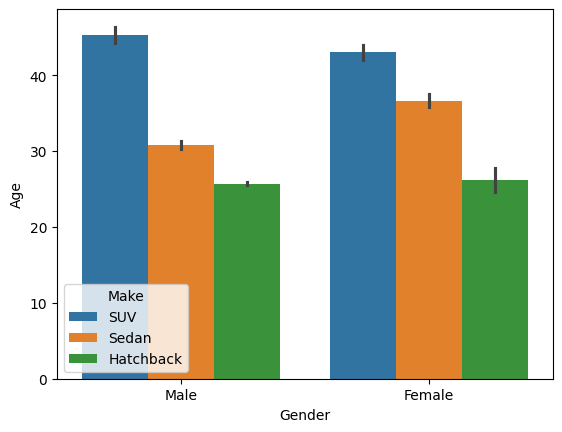

In [182]:
sns.barplot(data =df, x="Gender", y = "Age" , hue = "Make")
plt.show()

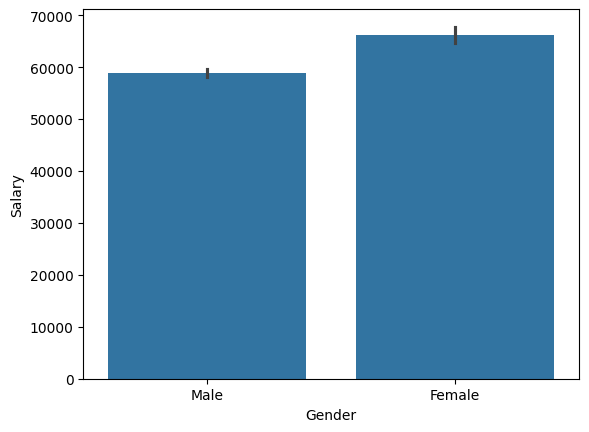

In [183]:
sns.barplot(data=df, x="Gender", y = "Salary")
plt.show()

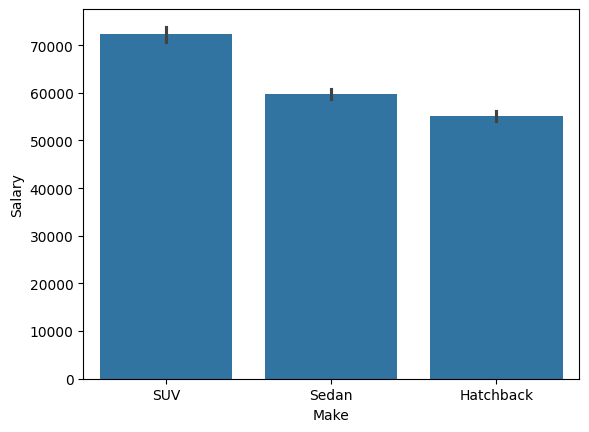

In [184]:
sns.barplot(data=df, x="Make", y = "Salary")
plt.show()

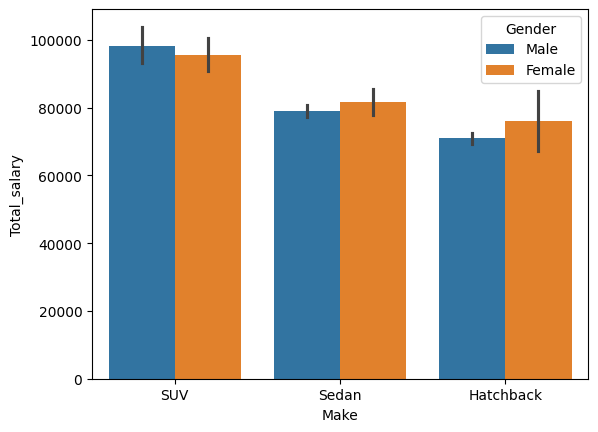

In [185]:
sns.barplot(data=df, x="Make", y = "Total_salary", hue = 'Gender')
plt.show()

# 4. ***Key Question's Visual Representation***

1. Do men tend to prefer SUVs more compared to women?

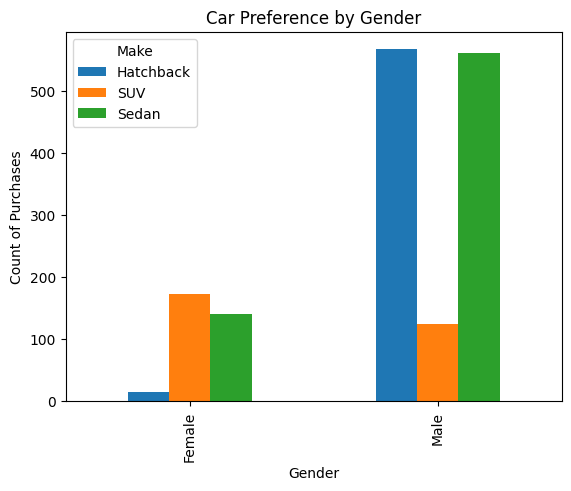

In [186]:
# Grouping by 'Gender' and 'Make' to get counts
gender_car_preference = df.groupby(["Gender", "Make"]).size().unstack().fillna(0)

# Visualizing the data with a bar plot for all car makes
gender_car_preference.plot(kind="bar", stacked=False)

# Set plot title and labels
plt.title("Car Preference by Gender")
plt.ylabel("Count of Purchases")
plt.xlabel("Gender")
plt.show()


2. What is the likelihood of a salaried person buying a Sedan?

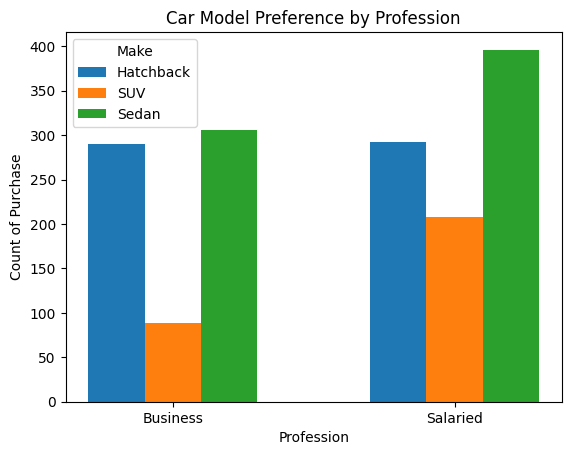

In [187]:
# Count occurrences of each car type per profession
car_counts = df.groupby(['Profession', 'Make']).size().unstack()
bar_width = 0.2
x = np.arange(len(car_counts.index))

for i, make in enumerate(car_counts.columns):
    plt.bar(x + i * bar_width - bar_width, car_counts[make], width=bar_width, label=make)

# Labels and title
plt.xticks(x, car_counts.index)
plt.xlabel("Profession")
plt.ylabel("Count of Purchase")
plt.title("Car Model Preference by Profession")
plt.legend(title="Make")
plt.show()

In [188]:
# Assuming salaried people have salary > 0
salaried_data = df[df["Salary"] > 0]

# Proportion of salaried individuals buying a Sedan
sedan_buyers = salaried_data[salaried_data["Make"] == "Sedan"]
likelihood_sedan = len(sedan_buyers) / len(salaried_data)
print("Likelihood of a salaried person buying a Sedan: " + str(round(likelihood_sedan, 2)))

Likelihood of a salaried person buying a Sedan: 0.44


 3. What evidence or data supports Sheldon Cooper's claim that a salaried male is an easier target for a SUV sale over a Sedan sale?

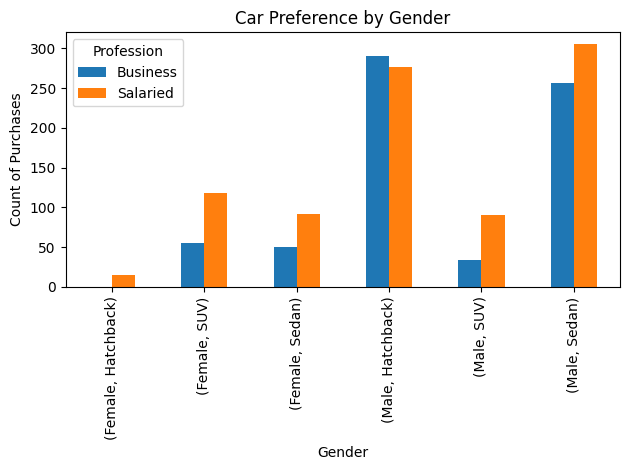

In [189]:
# Grouping by 'Gender', 'Make' and 'Profession' to get counts
gender_car_preference = df.groupby(["Gender", "Make", "Profession"]).size().unstack().fillna(0)

# Visualizing the data with a bar plot for all car makes
gender_car_preference.plot(kind="bar", stacked=False)

# Set plot title and labels
plt.title("Car Preference by Gender")
plt.ylabel("Count of Purchases")
plt.xlabel("Gender")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

4. How does the amount spent on purchasing automobiles vary by gender?

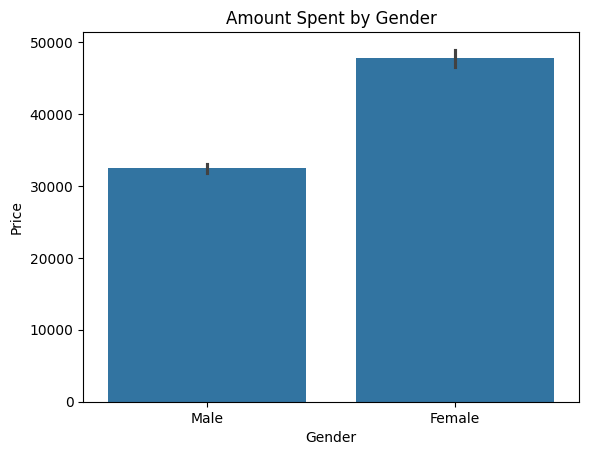

                mean
Gender              
Female  47705.167173
Male    32416.134185


In [190]:
# Grouping by Gender and calculating the average and median of money spent
spending_by_gender = df.groupby("Gender")["Price"].agg(["mean"])

# Visualizing the data
sns.barplot(x="Gender", y="Price", data=df)
plt.title("Amount Spent by Gender")
plt.show()

print(spending_by_gender)


5. How much money was spent on purchasing automobiles by individuals who took a personal loan?

Total amount spent by individuals who took a loan: $27290000


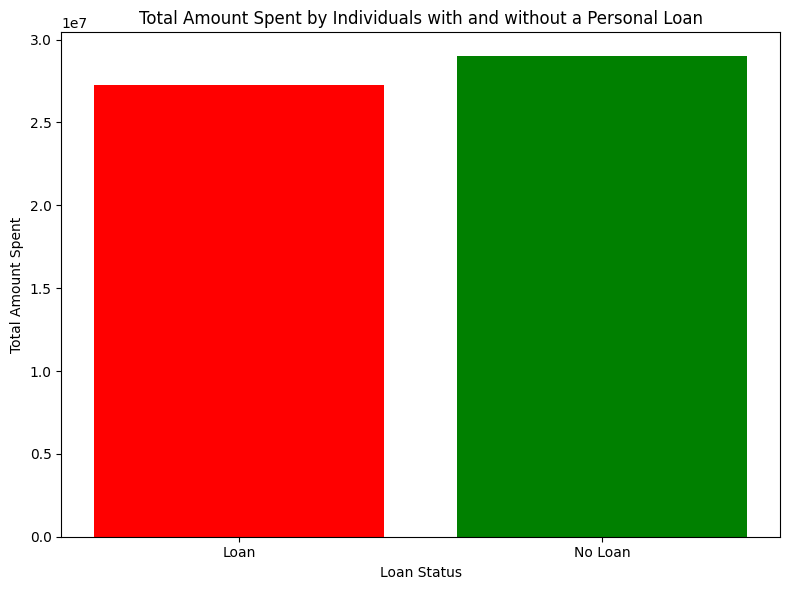

In [191]:
# Calculate total spent by people who took a loan
loan_data = df[df['Personal_loan'] == 'Yes']
total_spent_loan = loan_data['Price'].sum()

# Calculate total spent by people who didn't take a loan
no_loan_data = df[df['Personal_loan'] == 'No']
total_spent_no_loan = no_loan_data['Price'].sum()
print(f"Total amount spent by individuals who took a loan: ${total_spent_loan}")
# Create a dictionary with the total spent values
spending_data = {'Loan': total_spent_loan, 'No Loan': total_spent_no_loan}

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(spending_data.keys(), spending_data.values(), color=["red", "green"])
plt.title("Total Amount Spent by Individuals with and without a Personal Loan")
plt.ylabel("Total Amount Spent")
plt.xlabel("Loan Status")
plt.tight_layout()
plt.show()


6. How does having a working partner influence the purchase of higher-priced cars?

Partner_working
No     349
Yes    452
dtype: int64


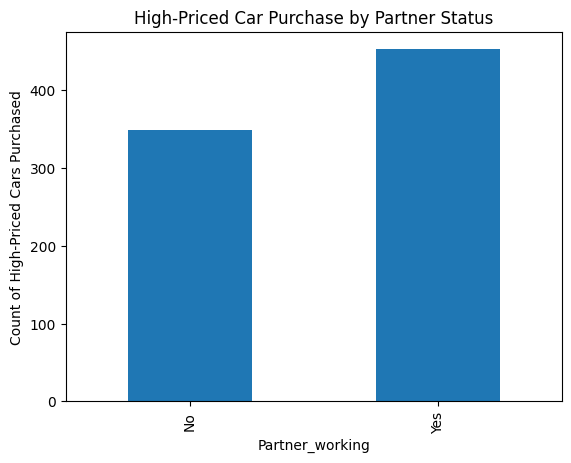

In [192]:
# Assuming cars priced above a certain amount are considered high-priced
price_threshold = 30000
high_priced_cars = data[data["Price"] > price_threshold]

# Grouping by Partner Status and calculating the number of high-priced car buyers
high_priced_by_partner = high_priced_cars.groupby("Partner_working").size()

print(high_priced_by_partner)

# Visualizing the comparison
high_priced_by_partner.plot(kind="bar")
plt.title("High-Priced Car Purchase by Partner Status")
plt.ylabel("Count of High-Priced Cars Purchased")
plt.show()
